In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
warnings.filterwarnings("ignore")

df = pd.read_excel(r'D:\Pressure-ulcer\data\pressure ulcer.xlsx')



# Data Insights

In [61]:
# Basic statistical summary
df.describe().T.style.bar(subset=['mean'], color='#E68193')\
                            .background_gradient(subset=['std'], cmap='mako_r')\
                             .background_gradient(subset=['50%'], cmap='mako') 


,count,mean,std,min,25%,50%,75%,max
Age,100.000000,52.350000,15.040937,14.000000,42.000000,55.000000,63.250000,85.000000
Duration of stay,100.000000,14.060000,14.816603,3.000000,4.000000,8.000000,15.000000,70.000000
BMI,100.000000,22.318360,3.858743,16.330000,20.057500,21.780000,24.265000,36.750000
HB,100.000000,10.553740,2.355227,7.150000,8.600000,10.020000,11.887500,17.820000
Albumin,100.000000,3.119200,0.634755,1.950000,2.697500,3.155000,3.447500,4.800000
Braden scale score,100.000000,14.010000,1.839494,10.000000,13.000000,14.000000,15.000000,19.000000
MAC,100.000000,28.174000,5.735793,16.500000,23.575000,28.350000,32.000000,47.000000
S/C FAT,100.000000,2.135000,0.887440,1.100000,1.500000,1.900000,2.425000,6.300000
caretaker score,100.000000,1.700000,0.460566,1.000000,1.000000,2.000000,2.000000,2.000000


In [66]:
numeric_data=df.select_dtypes(exclude=["category"])
numeric_feature = df.dtypes!=object
final_numeric_feature = df.columns[numeric_feature].tolist()
for i in range(len(final_numeric_feature)):
    stat,p = shapiro(df[final_numeric_feature[i]])
    print(final_numeric_feature[i])
    print('P_value=%.3f' % (p))
    print("*******************************")

Age
P_value=0.038
*******************************
Duration of stay
P_value=0.000
*******************************
BMI
P_value=0.000
*******************************
HB
P_value=0.000
*******************************
Albumin
P_value=0.083
*******************************
Braden scale score
P_value=0.011
*******************************
MAC
P_value=0.353
*******************************
S/C FAT
P_value=0.000
*******************************
caretaker score
P_value=0.000
*******************************


In [67]:
def out_lairs(col):
    """
    this function take the name of column and compute the median(Q2)represent 50% percentage
    and also compute the Q3(75%)from the boxblot then compute the inter_quantile_range 
    and then we compute the upper limit and the lowerlimit to show the origin of the outlairs
    
    """
    Q1 = df[col].quantile(0.25)
    Q3 =  df[col].quantile(0.75)
    IQR = Q3-Q1
    data_out = df.loc[(df[col] < (Q1-1.5*IQR)) | (df[col] > (Q3+1.5*IQR))][:10]
    
    return data_out 

In [68]:
out_lairs("BMI")

,Age,Sex,Duration of stay,GCS,BMI,HB,Albumin,Diagnosis,Braden scale score,MAC,S/C FAT,caretaker score
12,25,M,10,15,32.44,11.00,3.60,LD+MS,16,36.5,2.7,2
19,52,M,3,15,34.72,13.86,3.40,LD+MS,14,33.0,2.6,2
73,73,M,3,<15,36.75,13.80,3.04,LD,19,47.0,6.3,2
77,32,M,8,15,35.08,11.20,3.20,SI,12,39.0,2.3,1


In [69]:
out_lairs("HB")

,Age,Sex,Duration of stay,GCS,BMI,HB,Albumin,Diagnosis,Braden scale score,MAC,S/C FAT,caretaker score
23,66,M,4,15,20.76,17.61,4.1,LD,14,24.0,1.2,2
95,53,M,4,15,20.83,17.82,3.5,LD,17,25.5,4.8,2


In [70]:
out_lairs("Albumin")

,Age,Sex,Duration of stay,GCS,BMI,HB,Albumin,Diagnosis,Braden scale score,MAC,S/C FAT,caretaker score
28,55,F,60,15,18.75,10.04,4.8,LD+MS,14,20.0,1.4,2
31,50,M,6,15,25.82,10.25,4.7,LD+MS,16,41.0,2.8,1
46,14,M,30,15,18.29,13.00,4.7,SI,16,16.5,1.8,2


In [71]:
out_lairs("Braden scale score")

,Age,Sex,Duration of stay,GCS,BMI,HB,Albumin,Diagnosis,Braden scale score,MAC,S/C FAT,caretaker score
73,73,M,3,<15,36.75,13.8,3.04,LD,19,47.0,6.3,2


# Plots

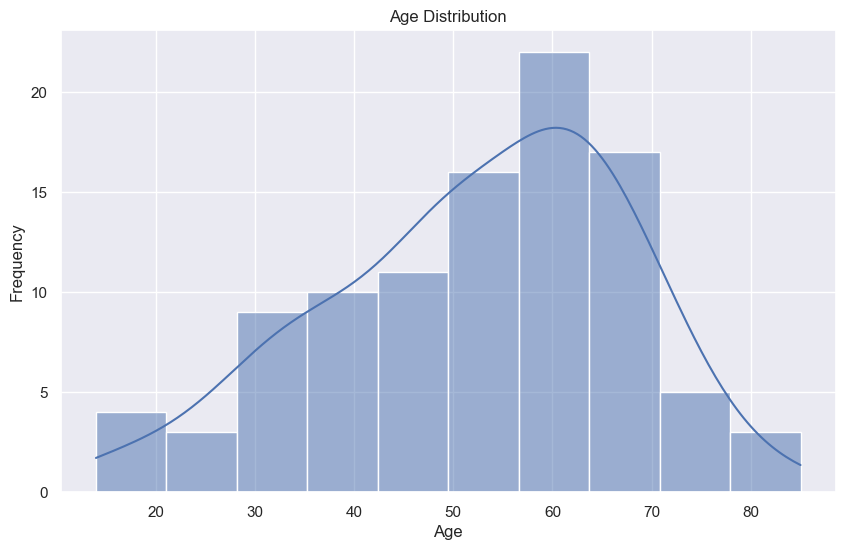

In [62]:


plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


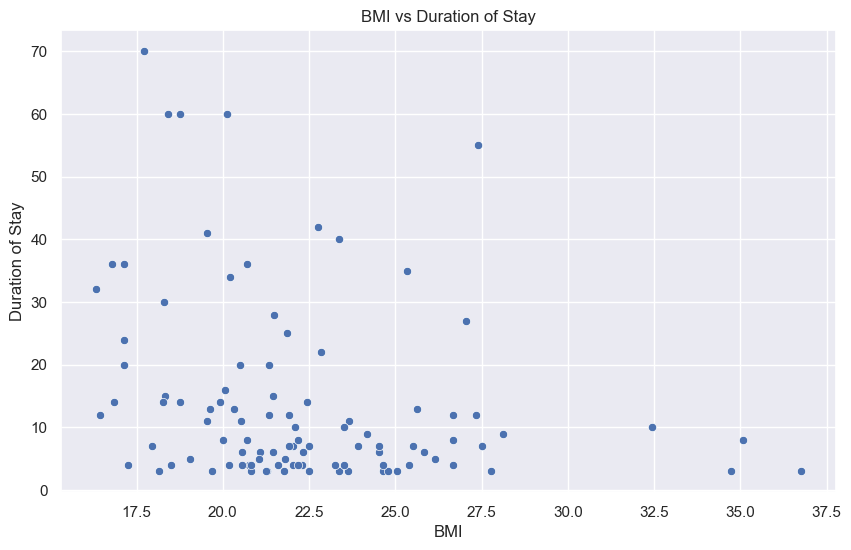

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Duration of stay', data=df)
plt.title('BMI vs Duration of Stay')
plt.xlabel('BMI')
plt.ylabel('Duration of Stay')
plt.show()


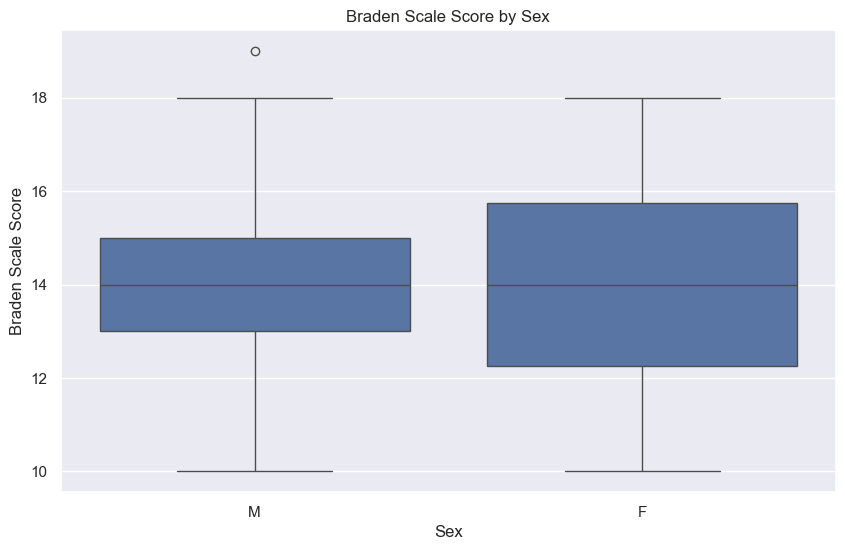

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Braden scale score', data=df)
plt.title('Braden Scale Score by Sex')
plt.xlabel('Sex')
plt.ylabel('Braden Scale Score')
plt.show()


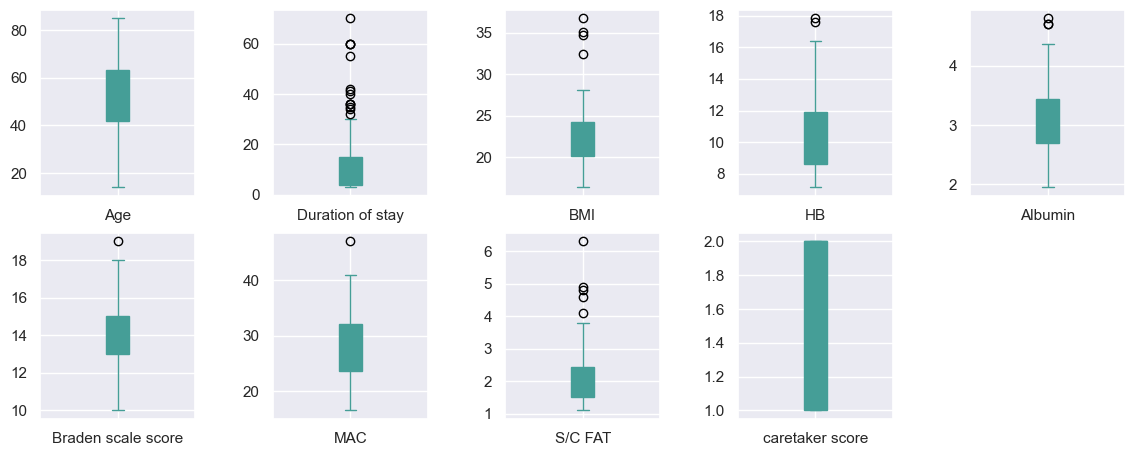

In [59]:
numeric_data=df.select_dtypes(exclude=["category"])
numeric_data.plot(subplots =True, kind = 'box', layout = (5,5), figsize = (14,14),patch_artist=True,color="#459E97")
plt.subplots_adjust(wspace = 0.5)

Text(0.5, 1.0, 'Correlation of Features')

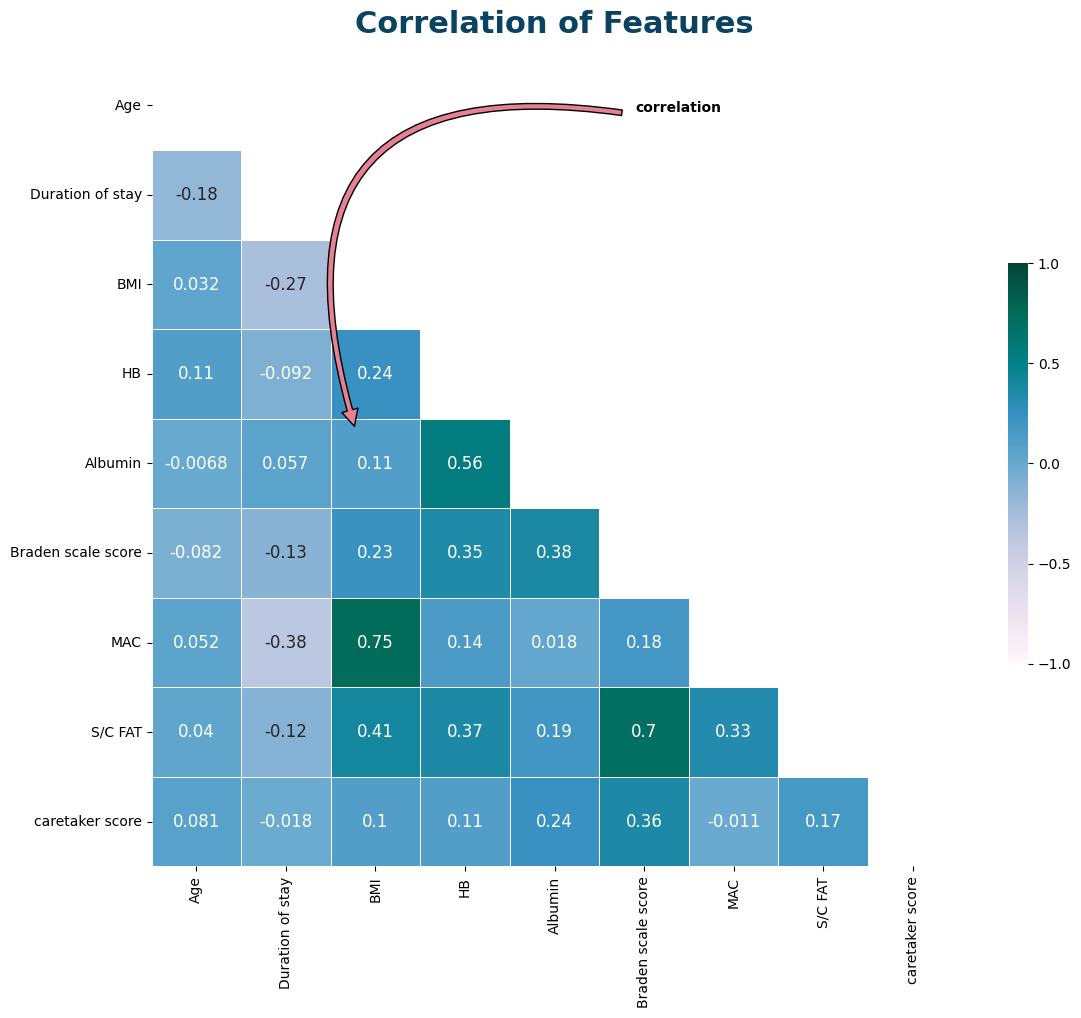

In [32]:
numeric_df = df.select_dtypes(include=[np.number])

# Create a mask for the upper triangle
mask = np.zeros_like(numeric_df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(13, 13))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(numeric_df.corr(),
                      mask=mask,
                      square=True,
                      linewidths=.5,
                      cmap='PuBuGn',
                      cbar_kws={'shrink': .4, "ticks": [-1, -.5, 0, 0.5, 1]},
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      annot_kws={"size": 12})

# Add the column names as labels
ax.set_yticklabels(numeric_df.columns, rotation=0)
ax.set_xticklabels(numeric_df.columns)

sns.set_style({'xtick.bottom': True, 'ytick.left': True})

ax.annotate('correlation',
            fontsize=10, fontweight='bold',
            xy=(2.3, 4.2), xycoords='data',
            xytext=(0.6, 0.95), textcoords='axes fraction',
            arrowprops=dict(
                facecolor="#E68193", shrink=0.025,
                connectionstyle='arc3, rad=0.80'),
            horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Correlation of Features', size=22, color='#0A4361', weight='bold', pad=20)


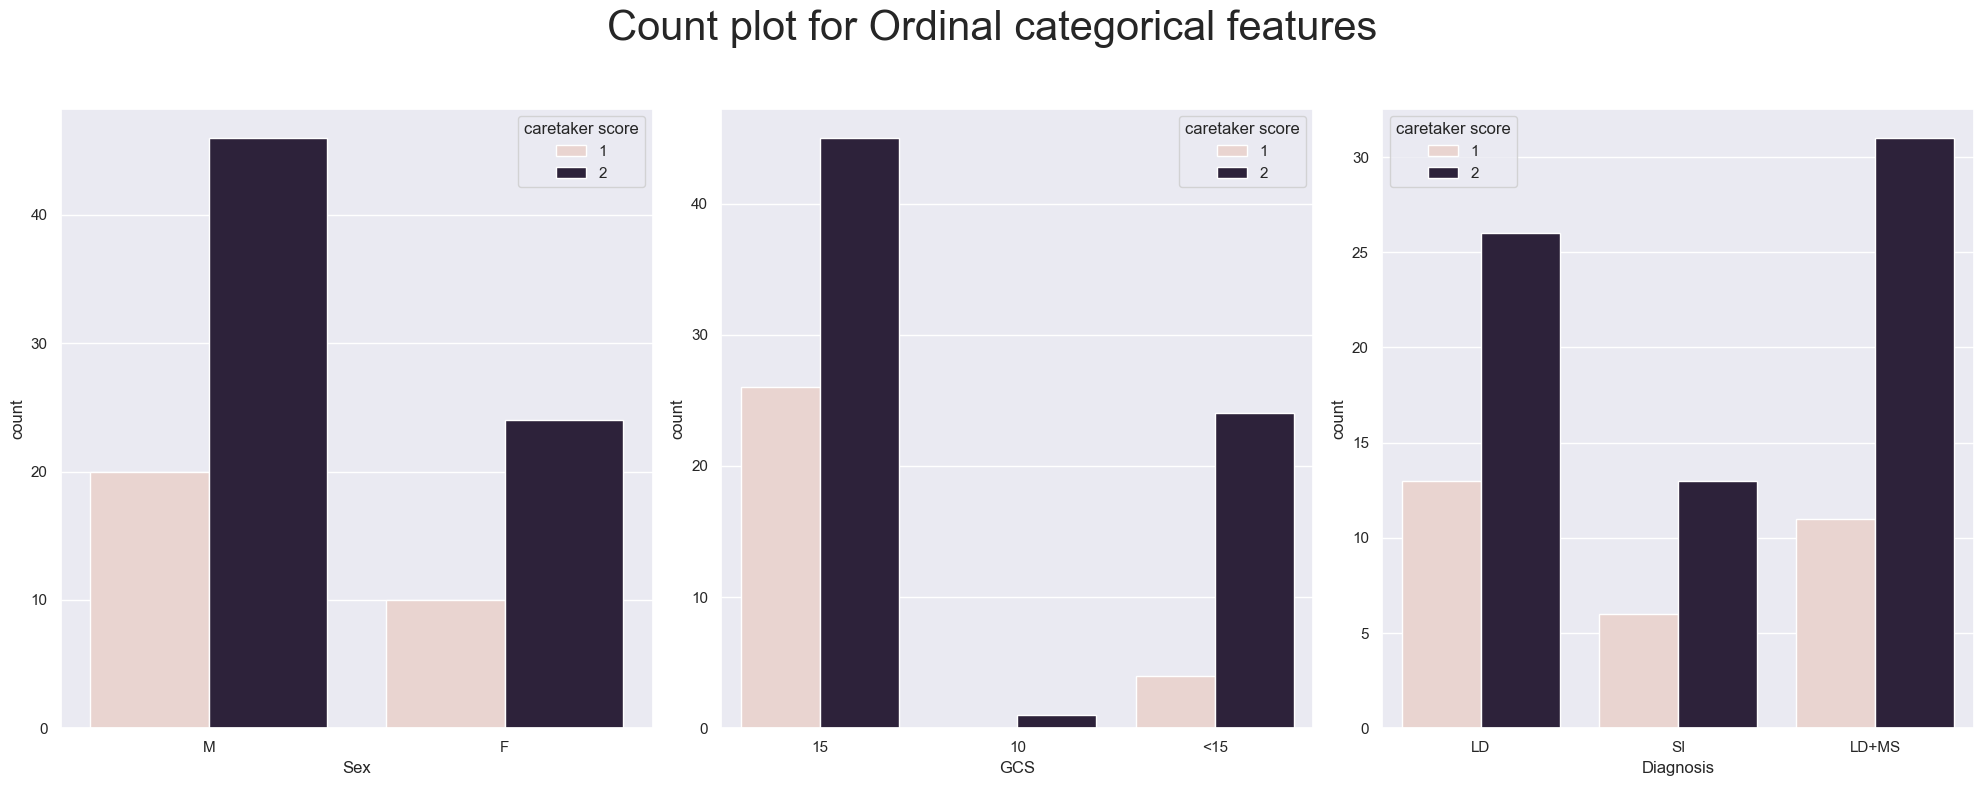

In [52]:
# Create a 1x3 grid of subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
plt.suptitle('Count plot for Ordinal categorical features', fontsize=30)

# Plot for 'Sex'
ax1 = sns.countplot(x='Sex', data=df, hue='caretaker score', ax=ax[0])
ax1.set(xlabel='Sex')

# Plot for 'GCS'
ax2 = sns.countplot(x='GCS', data=df, hue='caretaker score', ax=ax[1])
ax2.set(xlabel='GCS')

# Plot for 'Diagnosis'
ax3 = sns.countplot(x='Diagnosis', data=df, hue='caretaker score', ax=ax[2])
ax3.set(xlabel='Diagnosis')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])


<Axes: xlabel='Sex', ylabel='count'>

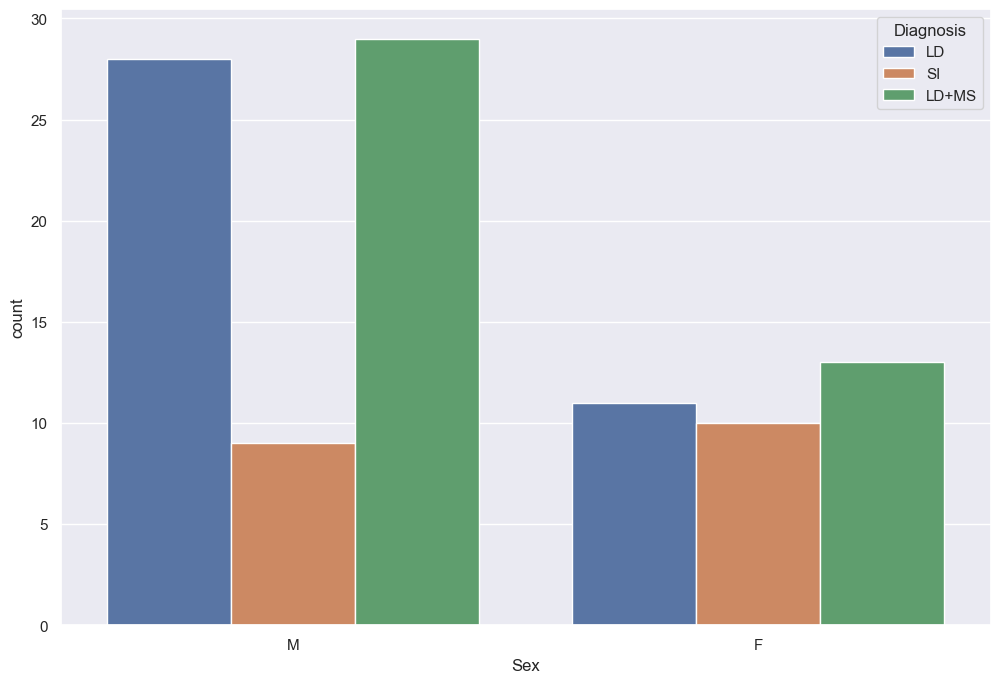

In [42]:
plt.figure(figsize=(12, 8))
sns.countplot(x ='Sex', data= df, hue= 'Diagnosis')

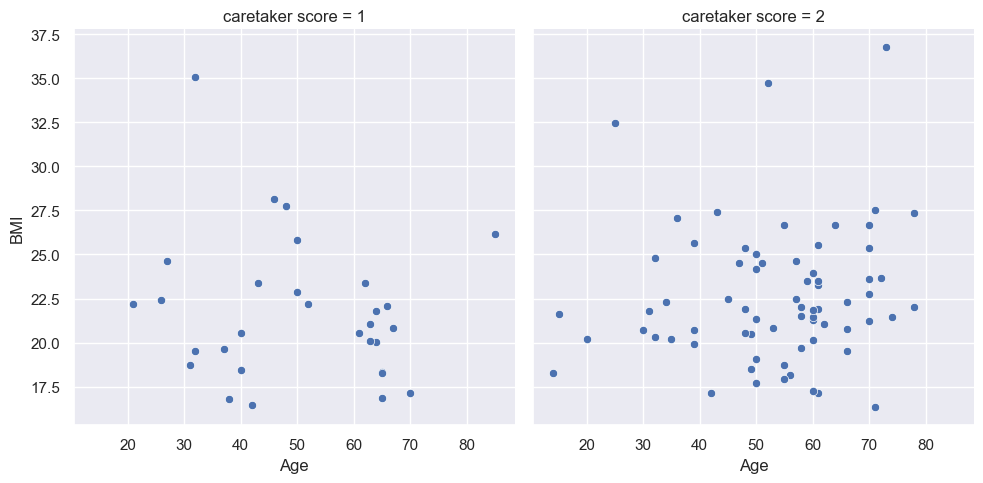

In [38]:
sns.relplot(x="Age",y='BMI',data=df,col="caretaker score",col_wrap=2, palette="husl")

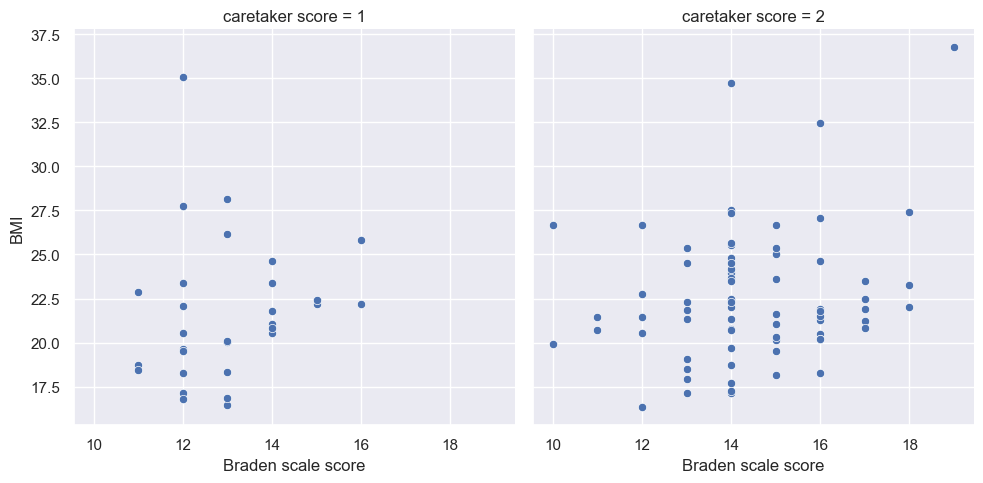

In [53]:
sns.relplot(x="Braden scale score",y='BMI',data=df,col="caretaker score",col_wrap=2, palette="husl")

In [33]:
#lets handle the skewing of the features
# Create a list of float colums to check for skewing
mask = df.dtypes == np.number
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [34]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

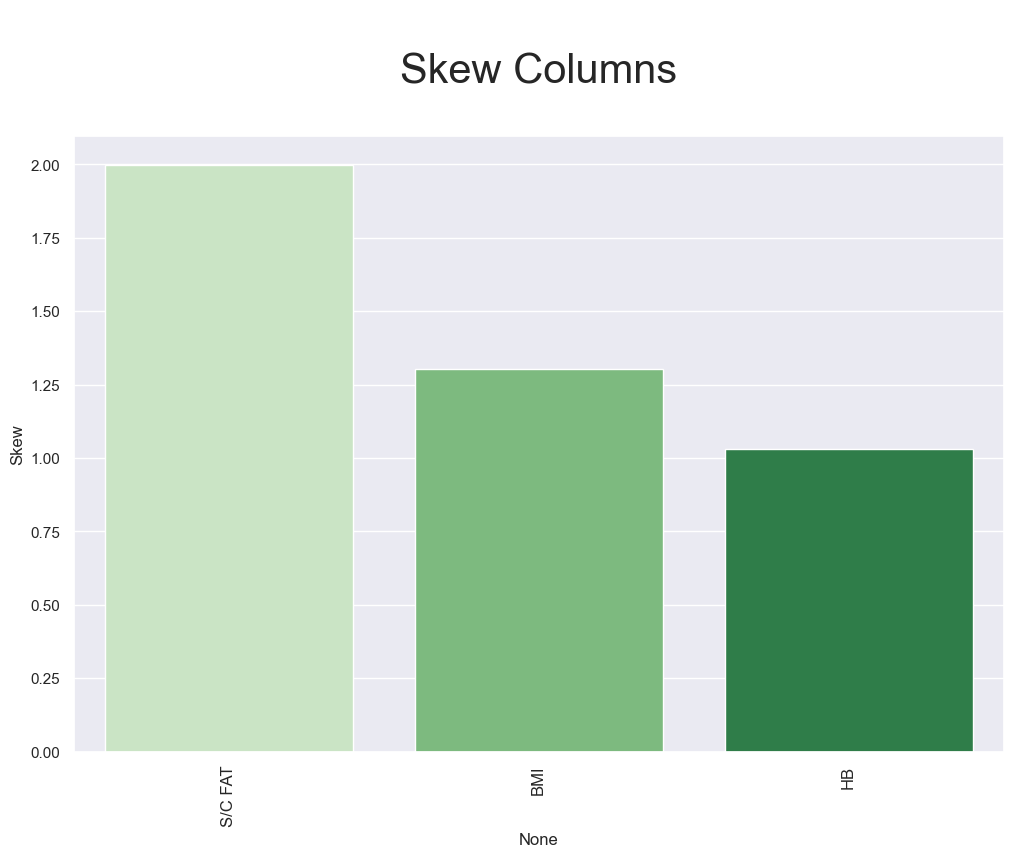

In [43]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x=skew_cols.index, y="Skew", data=skew_cols,palette="Greens",capsize=.1)
p.axes.set_title("\nSkew Columns\n",fontsize=30);